<a href="https://colab.research.google.com/github/Raries16/Audio-Text/blob/main/WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
pip install SpeechRecognition

In [13]:
pip install wordcloud

In [14]:
pip install Pillow

In [4]:
pip install pydub

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import speech_recognition as sr 
import os 
from pydub import AudioSegment
from pydub.silence import split_on_silence

In [6]:
AUDIO_FILE = ('/content/drive/MyDrive/Colab_Notebooks/Training.wav')

In [7]:
# create a speech recognition object
r = sr.Recognizer()

In [8]:
# a function that splits the audio file into chunks
# and applies speech recognition
def get_large_audio_transcription(path):
    """
    Splitting the large audio file into chunks
    and apply speech recognition on each of these chunks
    """
    # open the audio file using pydub
    sound = AudioSegment.from_wav(path)  
    # split audio sound where silence is 700 miliseconds or more and get chunks
    chunks = split_on_silence(sound,
        # experiment with this value for your target audio file
        min_silence_len = 500,
        # adjust this per requirement
        silence_thresh = sound.dBFS-14,
        # keep the silence for 1 second, adjustable as well
        keep_silence=500,
    )
    folder_name = "audio-chunks"
    # create a directory to store the audio chunks
    if not os.path.isdir(folder_name):
        os.mkdir(folder_name)
    whole_text = ""
    # process each chunk 
    for i, audio_chunk in enumerate(chunks, start=1):
        # export audio chunk and save it in
        # the `folder_name` directory.
        chunk_filename = os.path.join(folder_name, f"chunk{i}.wav")
        audio_chunk.export(chunk_filename, format="wav")
        # recognize the chunk
        with sr.AudioFile(chunk_filename) as source:
            audio_listened = r.record(source)
            # try converting it to text
            try:
                text = r.recognize_google(audio_listened)
            except sr.UnknownValueError as e:
                print("Error:", str(e))
            else:
                text = f"{text.capitalize()}. "
                print(chunk_filename, ":", text)
                whole_text += text
    # return the text for all chunks detected
    return whole_text

In [9]:
print("\nFull text:", get_large_audio_transcription(AUDIO_FILE))

Error: 
audio-chunks/chunk2.wav : Hi everybody laurence maroney here i'm at tensorflow world and we've just come from the keynote that was given by jeff dean and i saw jeff well, thanks for coming to talk with us lots of great contents so many things that we don't have time to go over them all but there was one really impactful thing that i saw and you were talking about liking computer vision the way now the error rates in humans is like 5% in computer vision and now with machines is down to 3%. 
audio-chunks/chunk3.wav : But i do think the progress we've made from about 26% error in 2011 down to 3% in 2016 is. 
audio-chunks/chunk4.wav : Hugely impactful because. 
audio-chunks/chunk5.wav : The way i like to think about it is computers have now of all guys that work right and so we've now got the ability for computers to perceive the world around them in ways that the didn't exist six or seven years ago and opened up applications of computing. just didn't exist before you can depend on

In [10]:
Full_text =  get_large_audio_transcription(AUDIO_FILE)
Full_text

Error: 
audio-chunks/chunk2.wav : Hi everybody laurence maroney here i'm at tensorflow world and we've just come from the keynote that was given by jeff dean and i saw jeff well, thanks for coming to talk with us lots of great contents so many things that we don't have time to go over them all but there was one really impactful thing that i saw and you were talking about liking computer vision the way now the error rates in humans is like 5% in computer vision and now with machines is down to 3%. 
audio-chunks/chunk3.wav : But i do think the progress we've made from about 26% error in 2011 down to 3% in 2016 is. 
audio-chunks/chunk4.wav : Hugely impactful because. 
audio-chunks/chunk5.wav : The way i like to think about it is computers have now of all guys that work right and so we've now got the ability for computers to perceive the world around them in ways that the didn't exist six or seven years ago and opened up applications of computing. just didn't exist before you can depend on

"Hi everybody laurence maroney here i'm at tensorflow world and we've just come from the keynote that was given by jeff dean and i saw jeff well, thanks for coming to talk with us lots of great contents so many things that we don't have time to go over them all but there was one really impactful thing that i saw and you were talking about liking computer vision the way now the error rates in humans is like 5% in computer vision and now with machines is down to 3%. But i do think the progress we've made from about 26% error in 2011 down to 3% in 2016 is. Hugely impactful because. The way i like to think about it is computers have now of all guys that work right and so we've now got the ability for computers to perceive the world around them in ways that the didn't exist six or seven years ago and opened up applications of computing. just didn't exist before you can depend on. Radiologist labeling x-rays or ophthalmologist labeling i images and then you train a computer vision model on t

In [15]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

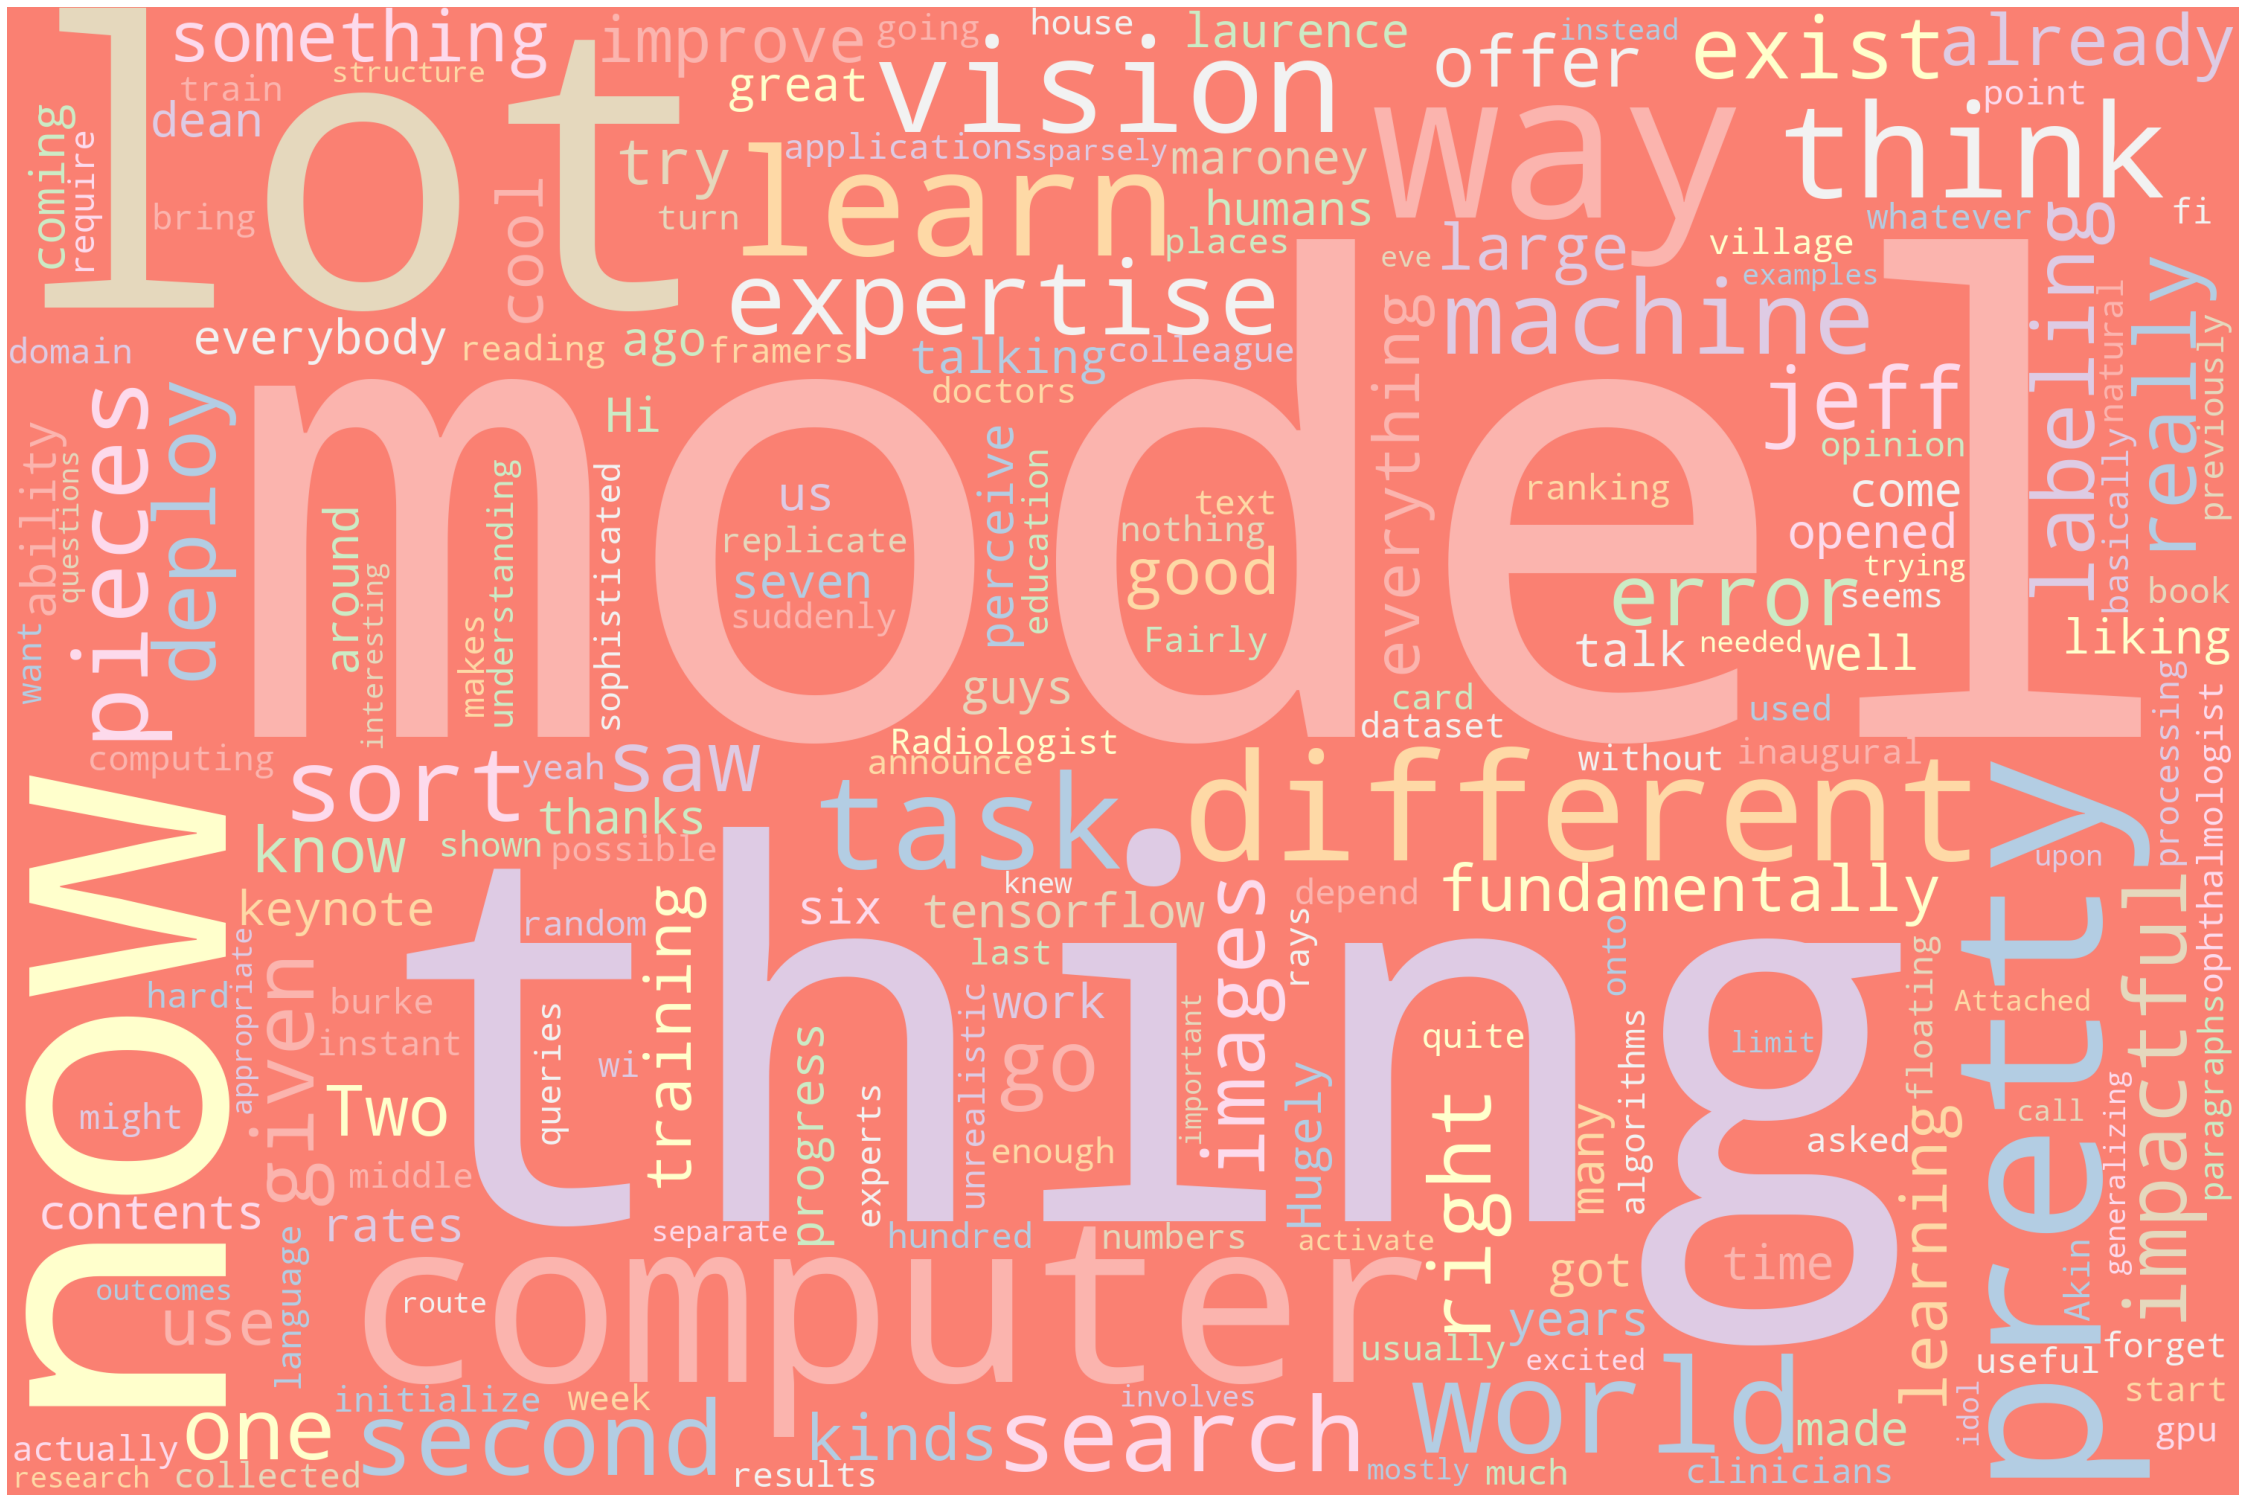

In [16]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(Full_text)
# Plot
plot_cloud(wordcloud)

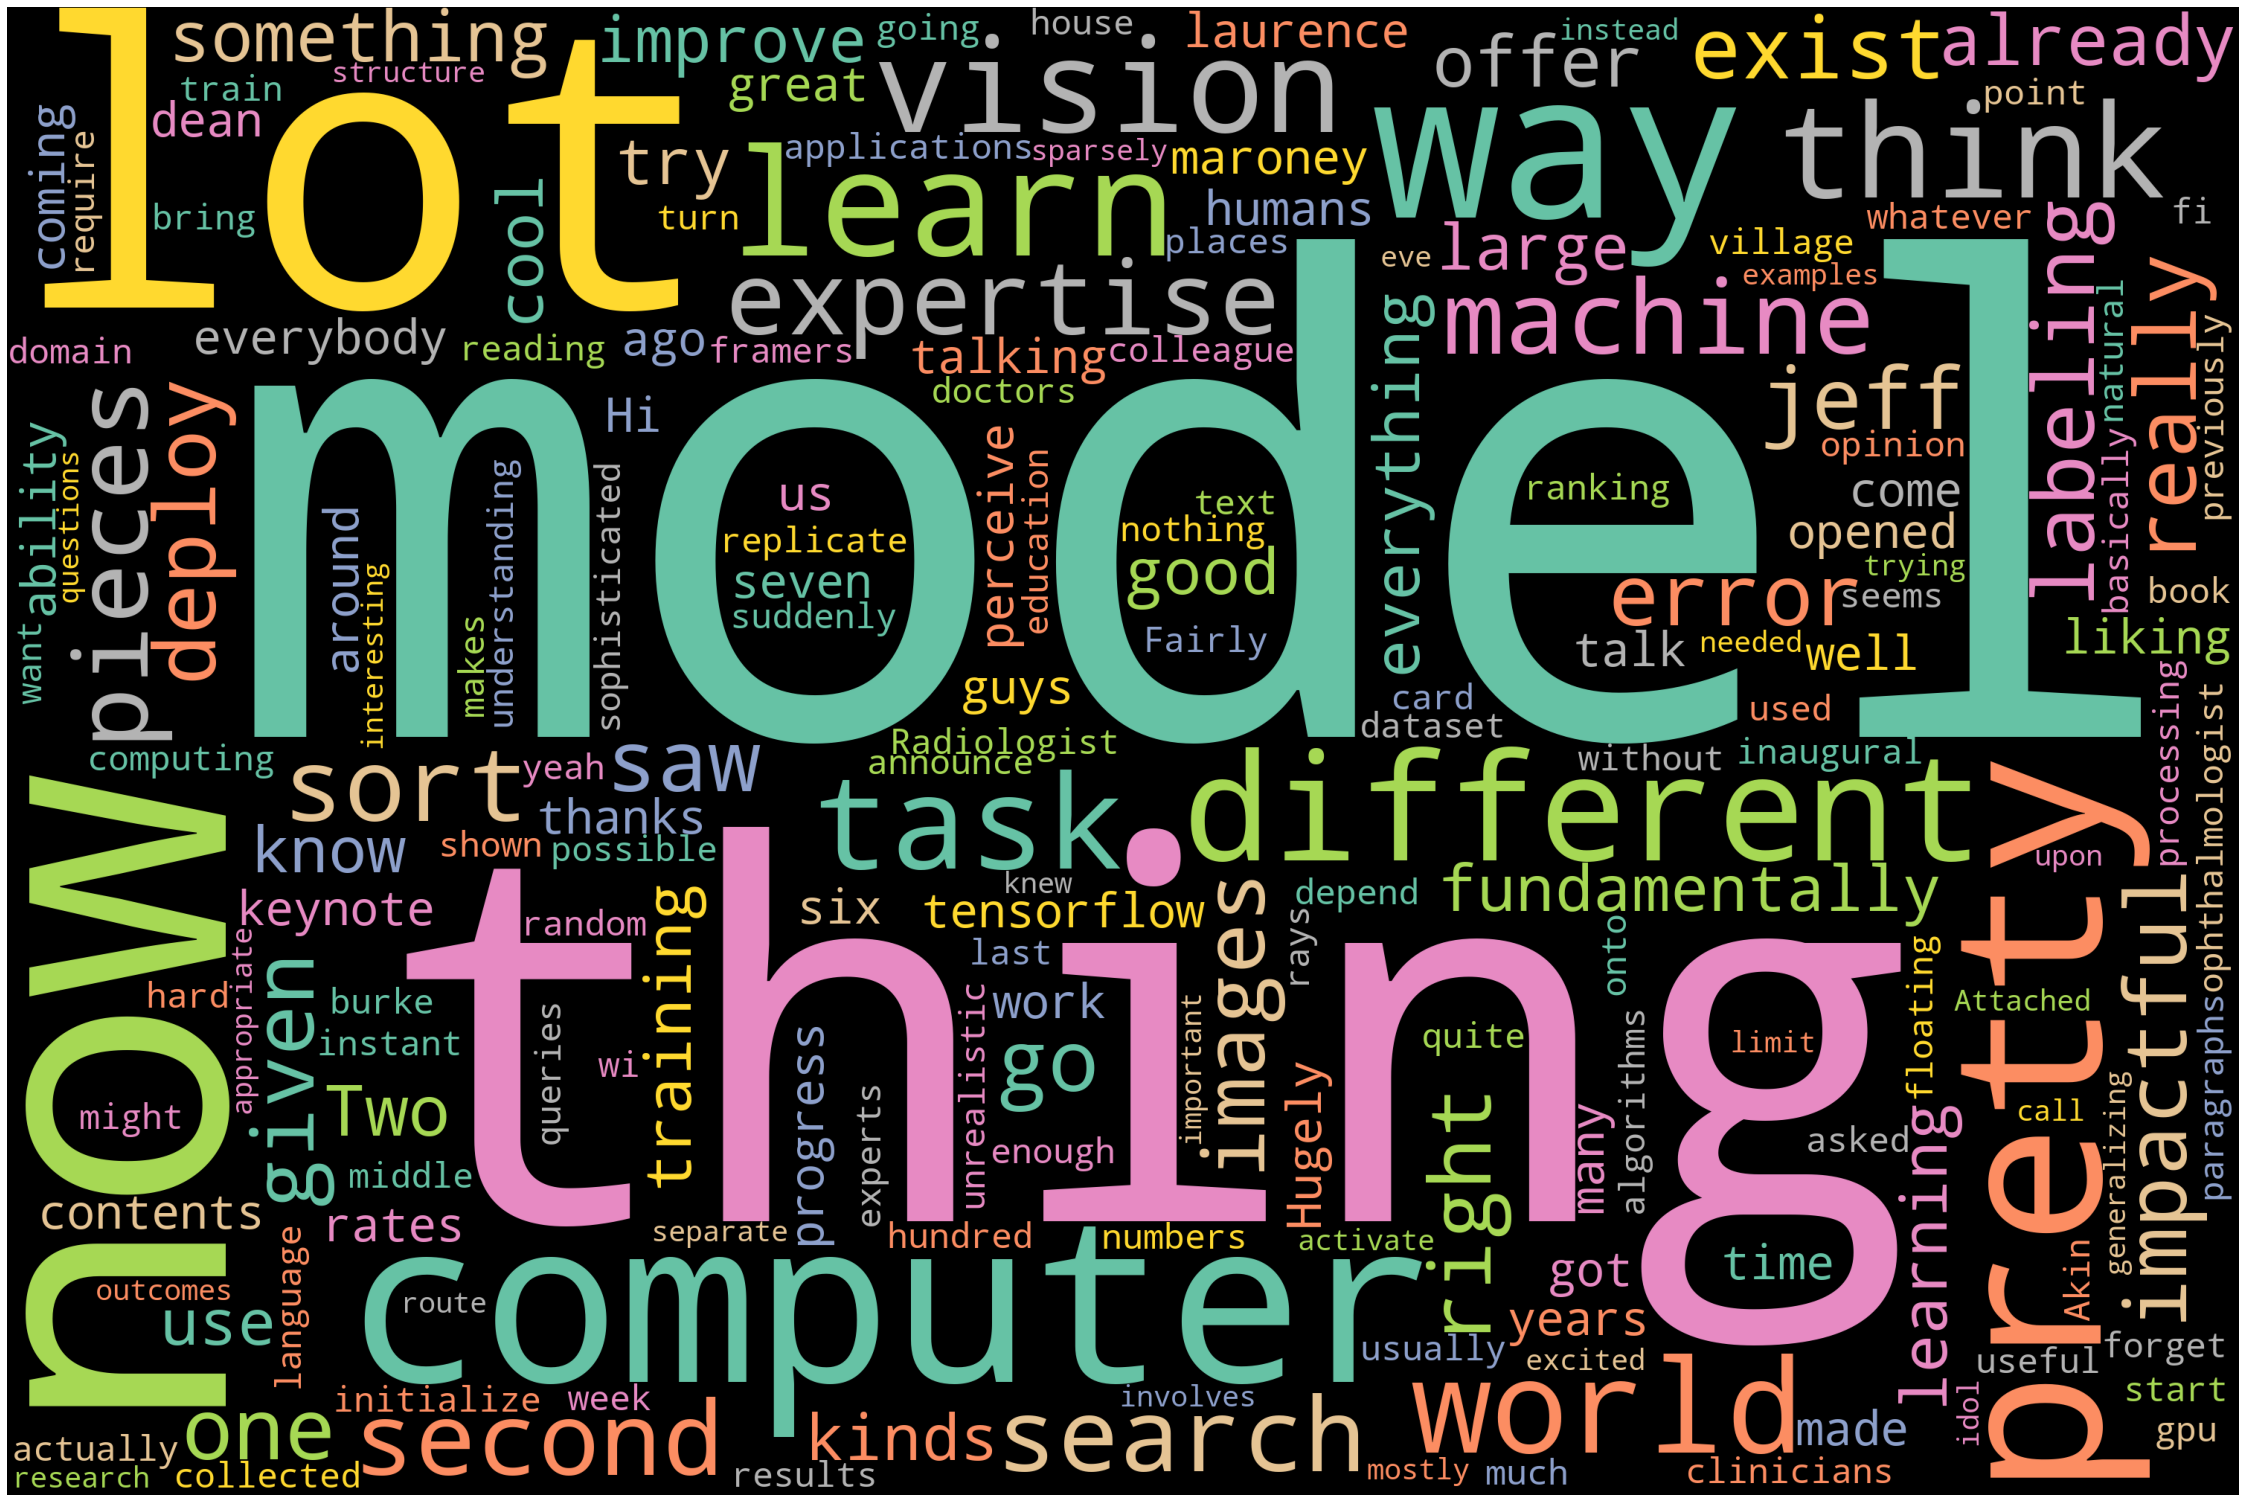

In [17]:
# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(Full_text)
# Plot
plot_cloud(wordcloud)

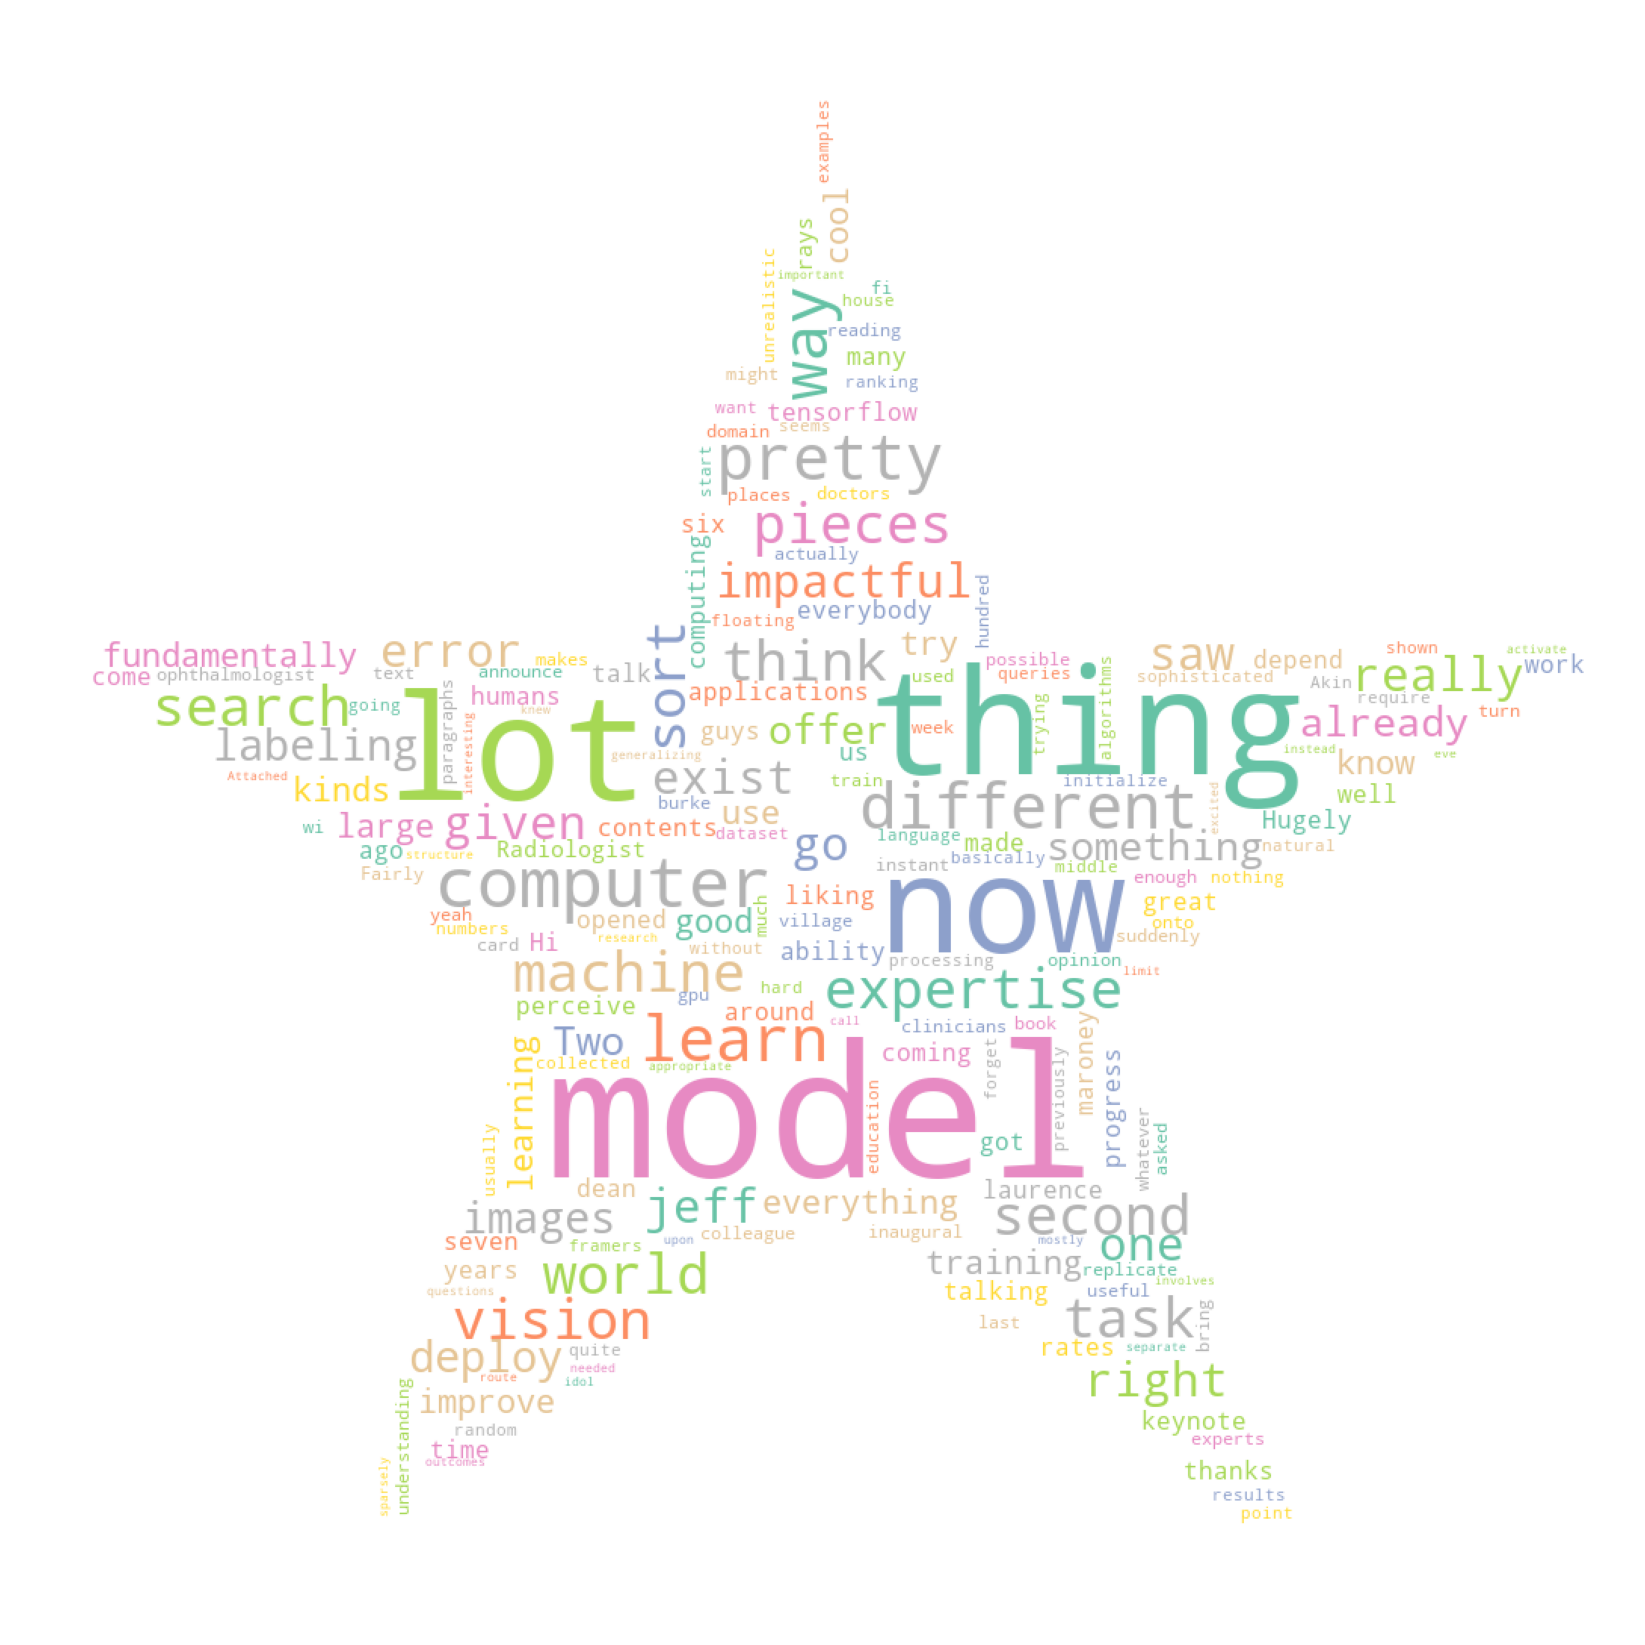

In [22]:
# Import packages
import numpy as np
from PIL import Image
# Import image to np.array
mask = np.array(Image.open('/content/drive/MyDrive/Colab_Notebooks/star.png'))
# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS, mask=mask).generate(Full_text)
# Plot
plot_cloud(wordcloud)